In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport

In [18]:
import wandb
import tempfile
import os
import warnings

# EDA

## 2.1 LOGIN WANDB

In [20]:
wandb.login()

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


True

## 2.2. Download raw_data artifact from wandb

In [21]:
# save_code tracking all changes of the notebook and sync with Wandb
run = wandb.init(project="Bank-Marketing", save_code=True)

In [22]:
run = wandb.init()
artifact = run.use_artifact('hangtn13-ssc-national-economics-university/Bank-Marketing/raw_data.csv:v0', type='raw_data')
artifact_dir = artifact.download()

CommError: HTTP 404: failed to find artifact collection raw_data.csv

In [6]:
df = pd.read_csv('bank-additional-full.csv', sep=';')

In [7]:
df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [9]:
df.describe()

age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198      1.734447     72.251528  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

In [ ]:
df.drop_duplicates(inplace=True)

In [11]:
df.shape

(41176, 21)

In [12]:
profile_report = ProfileReport(df)
profile_report.to_file('Bank Marketing EDA.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 21/21 [00:02<00:00,  7.00it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
profile_report

# **EDA**

## Univariate

<ipython-input-13-62b0bd2ae9c6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='y', data=df, palette='Set2')


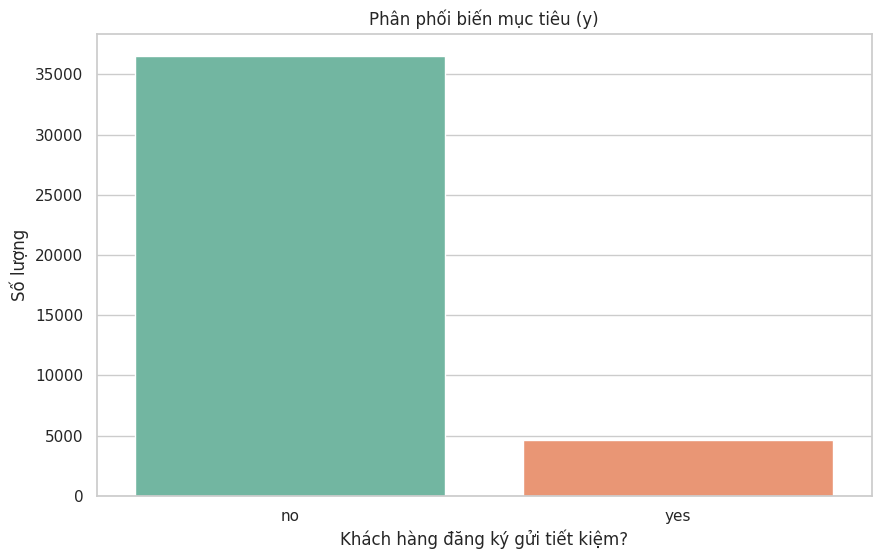

In [13]:
# 1. Phân phối biến mục tiêu
sns.countplot(x='y', data=df, palette='Set2')
plt.title('Phân phối biến mục tiêu (y)')
plt.xlabel('Khách hàng đăng ký gửi tiết kiệm?')
plt.ylabel('Số lượng')
plt.show()

Biến y là biến nhị phân với hai giá trị: 'yes' (có đăng ký) và 'no' (không đăng ký).

Kết quả phân phối rất mất cân bằng (imbalanced):
- 'no' chiếm khoảng 88% - 90% tổng số mẫu.

- 'yes' chỉ chiếm 10% - 12%.

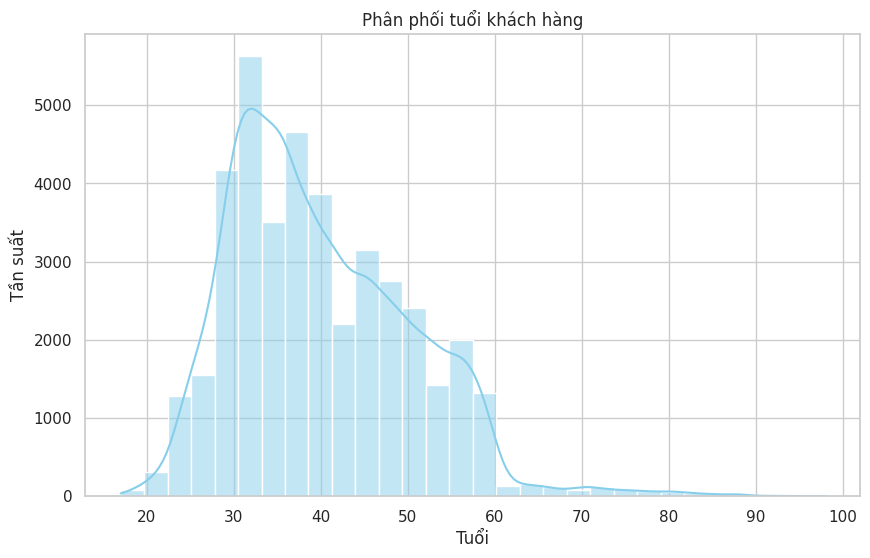

In [14]:
# 2. Phân phối tuổi
sns.histplot(df['age'], kde=True, bins=30, color='skyblue')
plt.title('Phân phối tuổi khách hàng')
plt.xlabel('Tuổi')
plt.ylabel('Tần suất')
plt.show()

- Tuổi khách hàng dao động chủ yếu trong khoảng từ 20 đến 60 tuổi.

- Phân phối lệch phải nhẹ (right-skewed):

- Đỉnh phổ nằm trong khoảng 30–40 tuổi.

- Một số outlier có thể trên 80 tuổi.

**Nhận xét:**
Đa phần khách hàng trong độ tuổi lao động và tích lũy – phù hợp với sản phẩm gửi tiết kiệm.

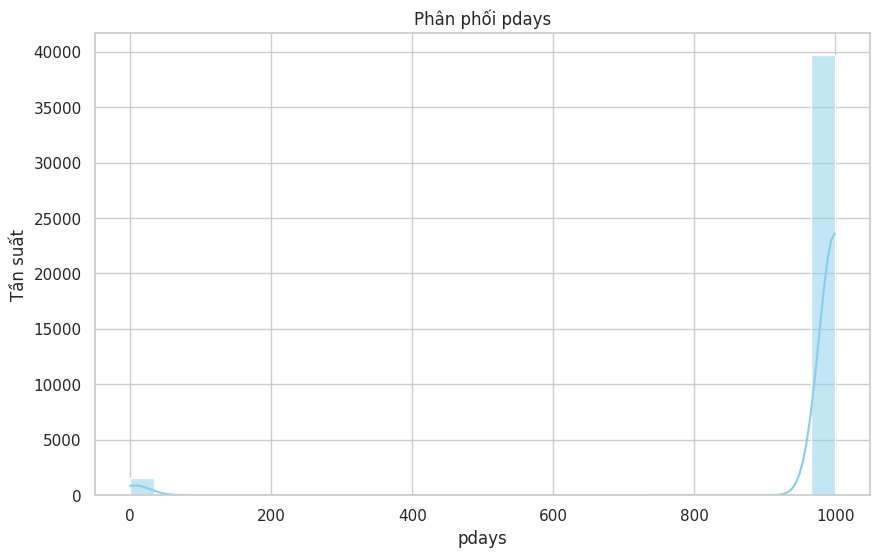

In [31]:
# 2. Phân phối pdays
sns.histplot(df['pdays'], kde=True, bins=30, color='skyblue')
plt.title('Phân phối pdays')
plt.xlabel('pdays')
plt.ylabel('Tần suất')
plt.show()

<ipython-input-15-2e398b11d57c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='job', data=df, order=df['job'].value_counts().index, palette='muted')


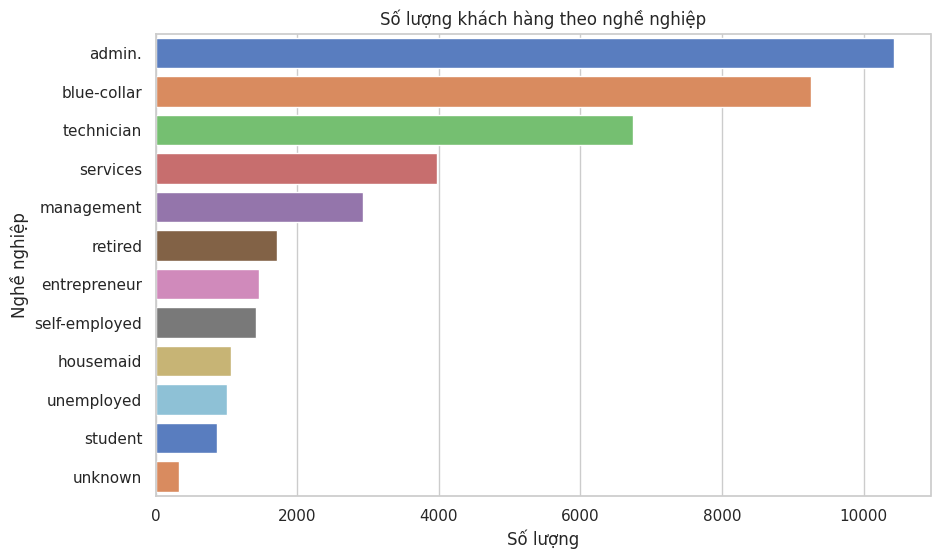

In [15]:
# 3. Nghề nghiệp
sns.countplot(y='job', data=df, order=df['job'].value_counts().index, palette='muted')
plt.title('Số lượng khách hàng theo nghề nghiệp')
plt.xlabel('Số lượng')
plt.ylabel('Nghề nghiệp')
plt.show()

**Quan sát:**

Các nhóm nghề nghiệp phổ biến nhất:

1. admin. (hành chính)

2. blue-collar (lao động phổ thông)

3. technician (kỹ thuật viên)

4. services (dịch vụ)

Các nhóm ít hơn:

student, unemployed, housemaid, unknown

**Nhận xét:**
Phân phối nghề nghiệp phản ánh đa dạng tầng lớp trong xã hội

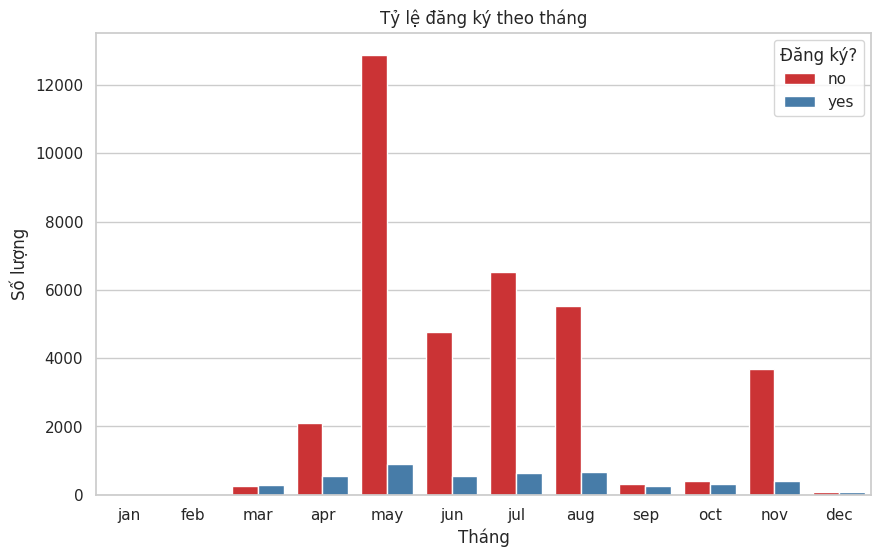

In [16]:
# 4. Tỷ lệ đăng ký theo tháng
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
sns.countplot(data=df, x='month', hue='y', order=month_order, palette='Set1')
plt.title('Tỷ lệ đăng ký theo tháng')
plt.xlabel('Tháng')
plt.ylabel('Số lượng')
plt.legend(title='Đăng ký?')
plt.show()

**Quan sát:**
- Một số tháng như May, August, October có số lượng gọi rất cao.

- Tuy nhiên, tỷ lệ 'yes' thường cao hơn trong các tháng có ít lượt gọi hơn như March, December.

**Nhận xét:**

- Chiến dịch tiếp thị được thực hiện không đồng đều giữa các tháng.

- Có thể hiệu quả chiến dịch không chỉ phụ thuộc vào số lượng gọi, mà còn vào thời điểm trong năm (ví dụ gần cuối năm – khách có xu hướng gửi tiết kiệm).

- Tháng May có số lượng cuộc gọi cao nhất nhưng tỷ lệ “yes” lại không cao tương ứng, có thể phản ánh chiến dịch chưa hiệu quả.

<ipython-input-17-85bf9c273ff1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='y', y='duration', data=df, palette='coolwarm')


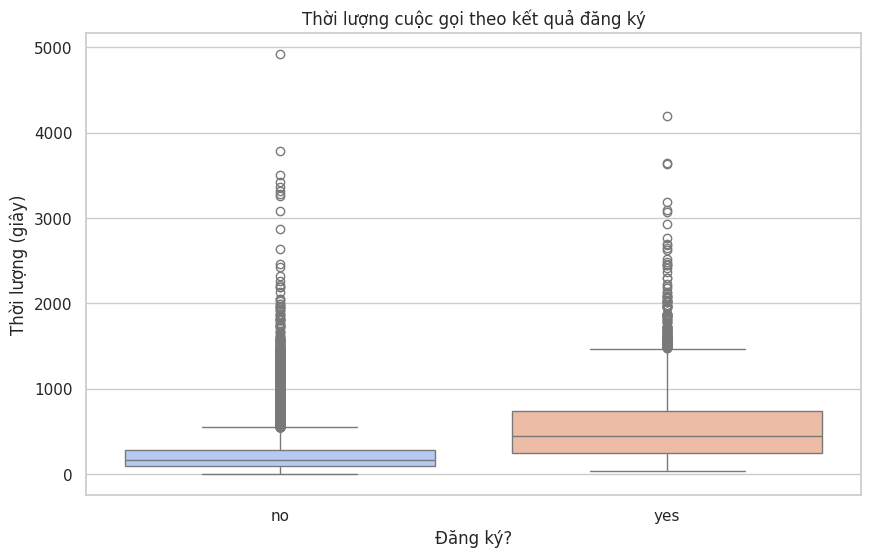

In [17]:
# 5. Boxplot thời lượng gọi theo kết quả
sns.boxplot(x='y', y='duration', data=df, palette='coolwarm')
plt.title('Thời lượng cuộc gọi theo kết quả đăng ký')
plt.xlabel('Đăng ký?')
plt.ylabel('Thời lượng (giây)')
plt.show()

**Quan sát:**
- Khi khách hàng không đăng ký (y='no'), thời lượng cuộc gọi thường ngắn hơn rõ rệt.

- Khi đăng ký (y='yes'), thời lượng cuộc gọi có xu hướng cao hơn và phân phối rộng hơn.

## Multivariate

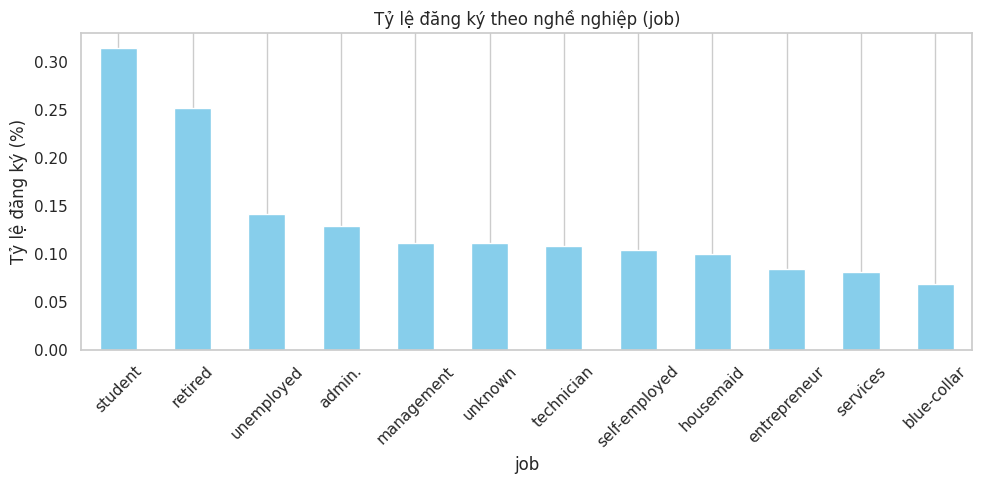

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tỷ lệ 'yes' theo job
job_conversion = df.groupby('job')['y'].value_counts(normalize=True).unstack().fillna(0)['yes']

plt.figure(figsize=(10,5))
job_conversion.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Tỷ lệ đăng ký theo nghề nghiệp (job)')
plt.ylabel('Tỷ lệ đăng ký (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

<ipython-input-19-f84bfc91d487>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=month_conversion.index, y=month_conversion['yes'], palette='viridis')


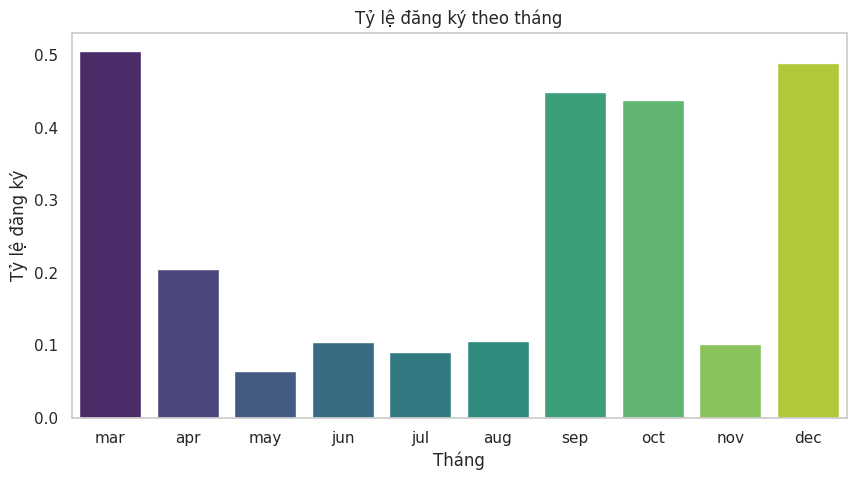

In [19]:
# Sắp xếp theo thứ tự tháng
month_order = ['mar','apr','may','jun','jul','aug','sep','oct','nov','dec']

month_conversion = df.groupby('month')['y'].value_counts(normalize=True).unstack().fillna(0)
month_conversion = month_conversion.loc[month_order]

plt.figure(figsize=(10,5))
sns.barplot(x=month_conversion.index, y=month_conversion['yes'], palette='viridis')
plt.title('Tỷ lệ đăng ký theo tháng')
plt.ylabel('Tỷ lệ đăng ký')
plt.xlabel('Tháng')
plt.grid(axis='y')
plt.show()

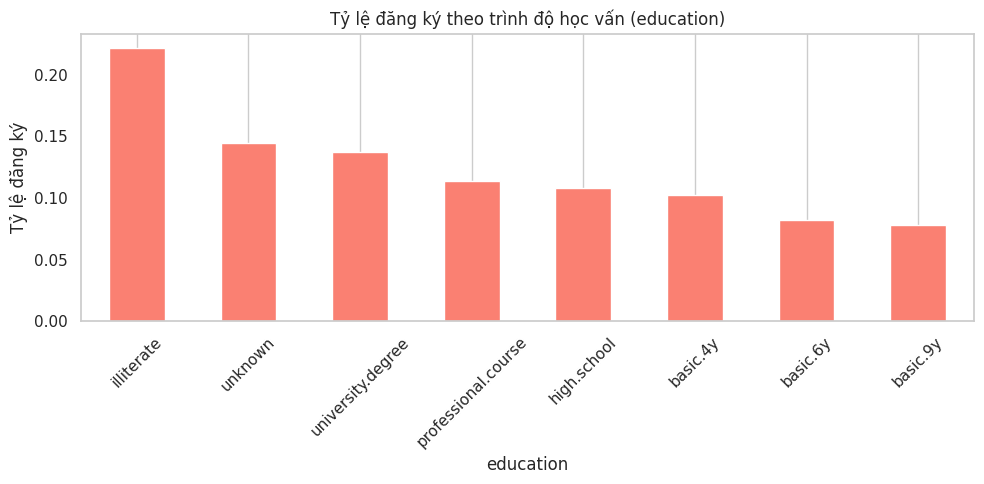

In [27]:
edu_conversion = df.groupby('education')['y'].value_counts(normalize=True).unstack().fillna(0)['yes']

plt.figure(figsize=(10,5))
edu_conversion.sort_values(ascending=False).plot(kind='bar', color='salmon')
plt.title('Tỷ lệ đăng ký theo trình độ học vấn (education)')
plt.ylabel('Tỷ lệ đăng ký')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Nhận xét:**
- University.degree và professional.course có tỷ lệ đăng ký cao hơn.

- Basic.4y / 6y / 9y có tỷ lệ thấp hơn – trình độ học vấn cao => hiểu rõ lợi ích sản phẩm hơn.

=> Education là yếu tố quan trọng và có phân biệt rõ rệt giữa các nhóm.

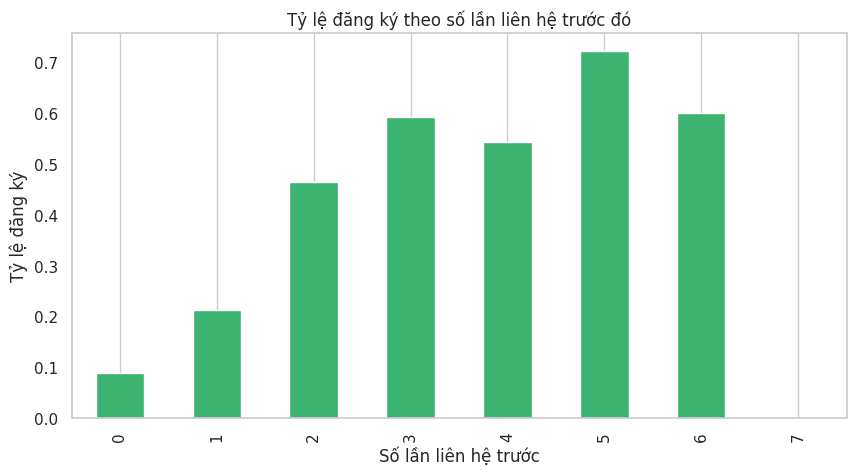

In [25]:
# Chỉ phân tích các giá trị hợp lý
prev_conv = df[df['previous'] < 20].groupby('previous')['y'].value_counts(normalize=True).unstack().fillna(0)['yes']

plt.figure(figsize=(10,5))
prev_conv.plot(kind='bar', color='mediumseagreen')
plt.title('Tỷ lệ đăng ký theo số lần liên hệ trước đó')
plt.ylabel('Tỷ lệ đăng ký')
plt.xlabel('Số lần liên hệ trước')
plt.grid(axis='y')
plt.show()

- Tỷ lệ đăng ký tăng theo số lần liên hệ trước đó (tới khoảng 3–4 lần), sau đó bắt đầu giảm.

- Điều này cho thấy hiệu ứng tiếp xúc nhiều lần ban đầu giúp tăng khả năng chuyển đổi, nhưng gọi quá nhiều có thể gây phản tác dụng (bị làm phiền).

## HEATMAP

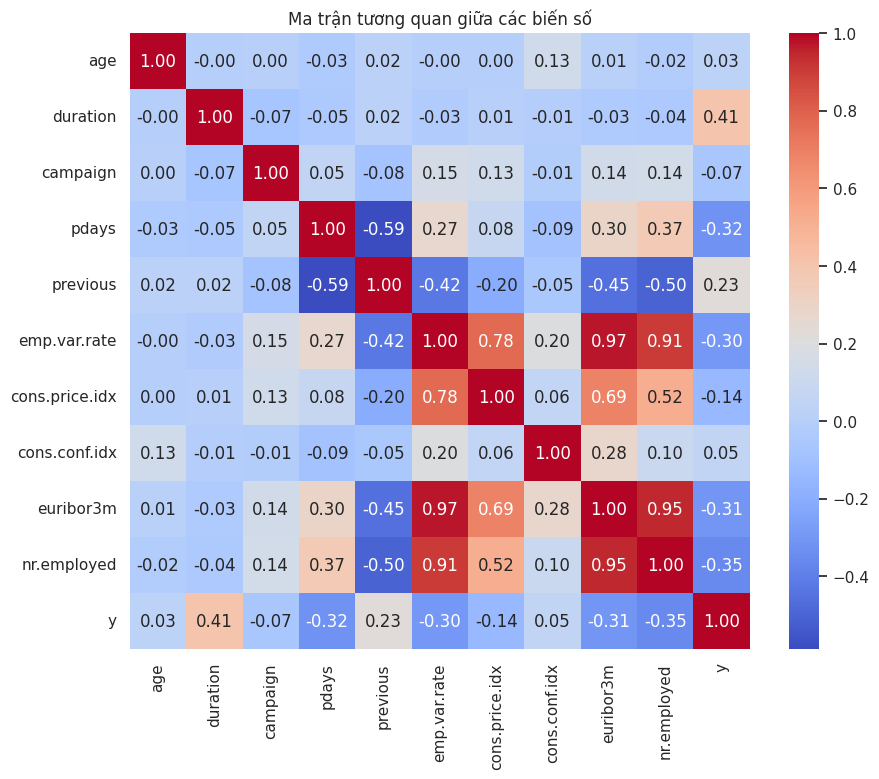

In [28]:
# Chuyển biến nhị phân thành số để tính corr
df_corr = df.copy()
df_corr['y'] = df_corr['y'].map({'yes': 1, 'no': 0})

plt.figure(figsize=(10,8))
sns.heatmap(df_corr.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Ma trận tương quan giữa các biến số')
plt.show()

# **OUTLIERS**

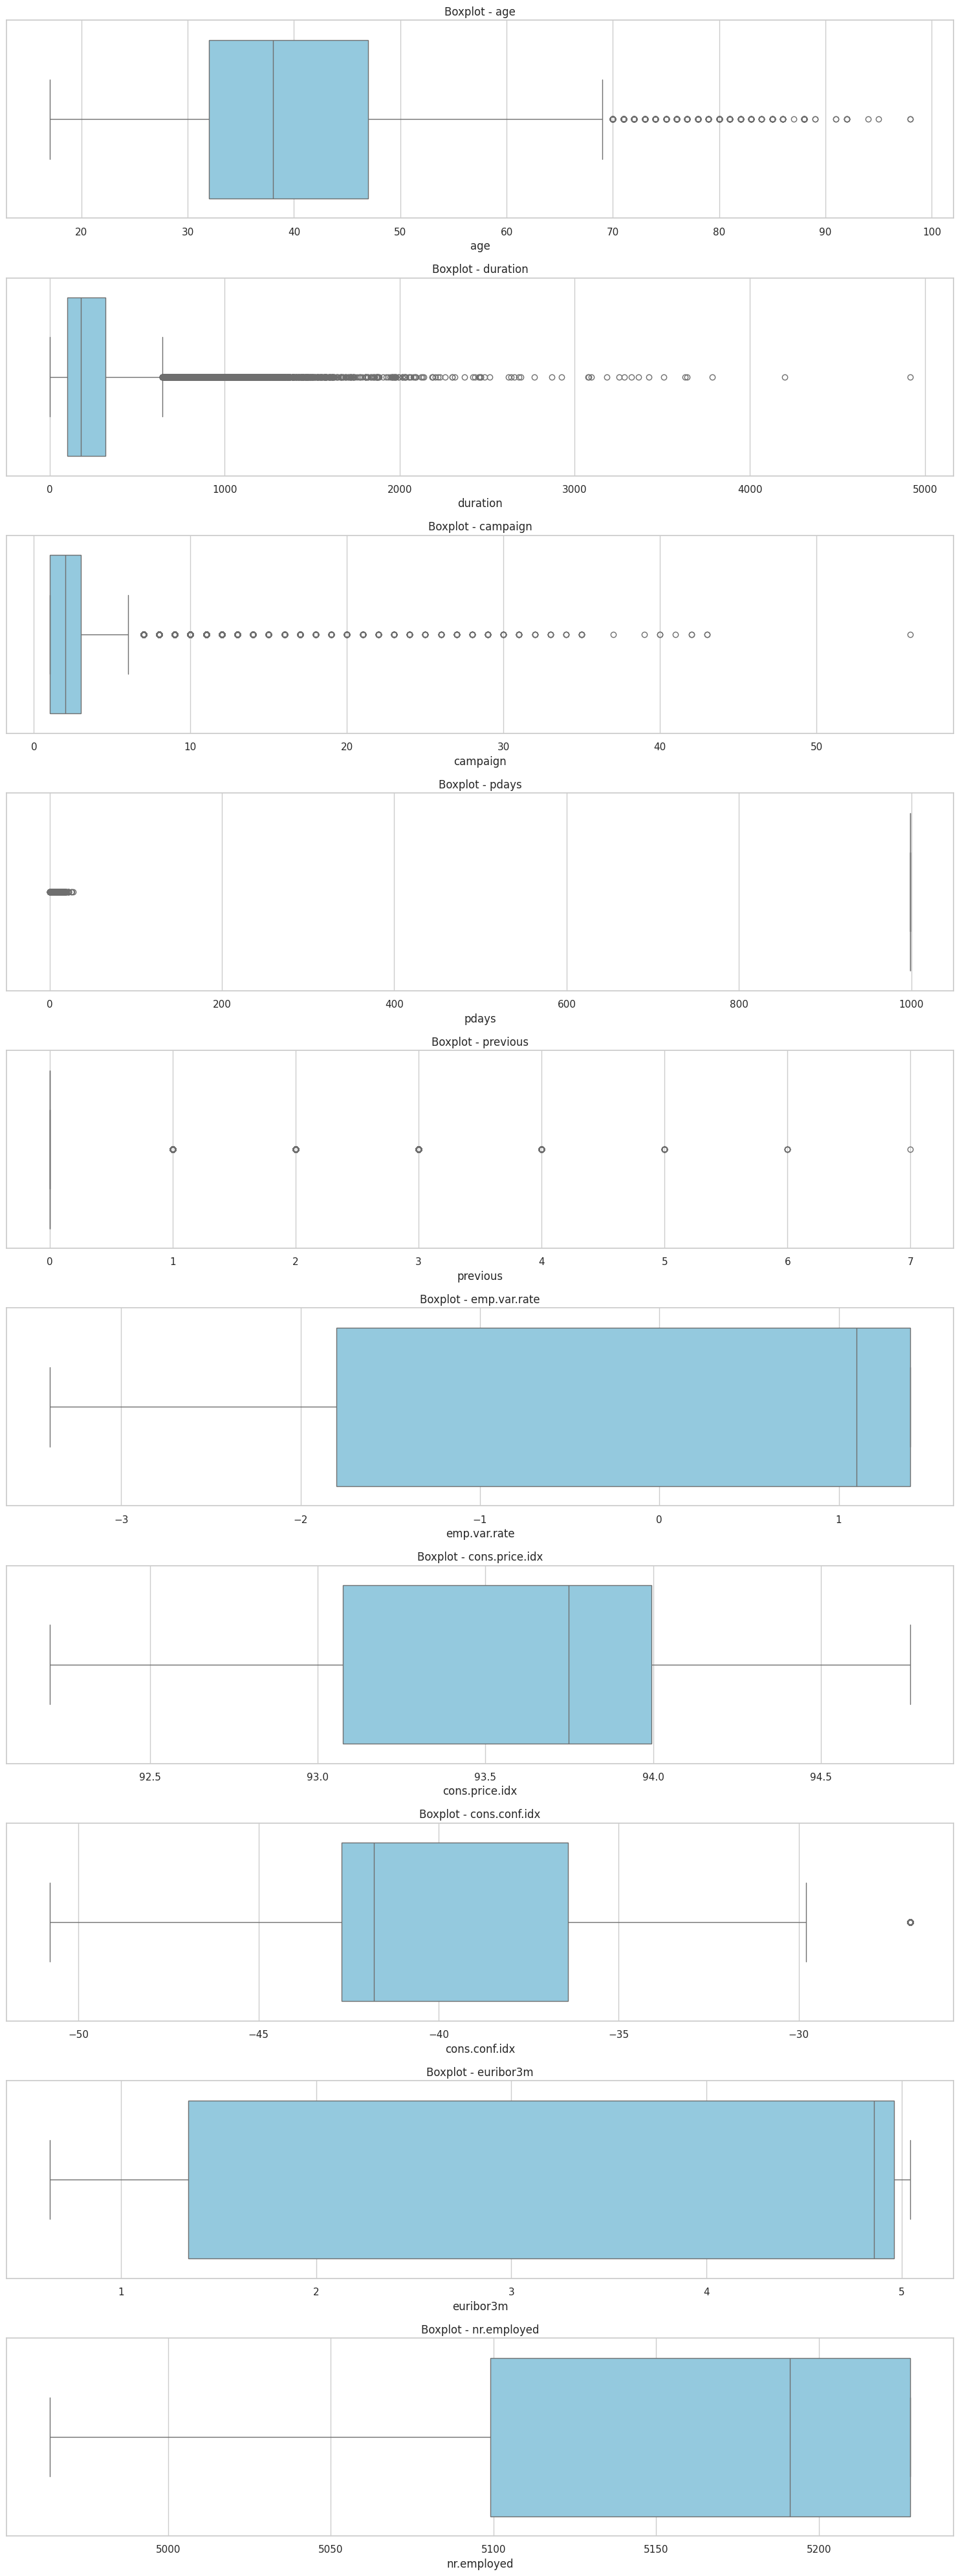

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Lọc các biến số (numeric columns)
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Set style
sns.set(style="whitegrid")

# Vẽ boxplot cho từng biến
plt.figure(figsize=(15, 4 * len(numerical_cols)))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols), 1, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot - {col}')
    plt.tight_layout()

plt.show()